In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

In [3]:
df_el = pd.read_csv('./observation/East Lansing 5 min_crc.csv')
df_gl = pd.read_csv('./observation/CRNH0203-2007-2018-MI_Gaylord_9_SSW_crc.csv')
df_gr = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
df_ele = pd.read_csv('./observation/East Leland 5 min.csv')
df_sh = pd.read_csv('./observation/South Haven 5 min_crc.csv')
df_tvc = pd.read_csv('observation/ASOS Traverse City_crc_1.csv')

In [12]:
t_daymin_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].min()
t_daymin_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].min()
t_daymin_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].min()
t_daymin_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].min()
t_daymin_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].min()
t_daymin_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].min()

t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]

In [4]:
t_daymax_obs_el = df_el.groupby([df_el.YEAR,df_el.MONTH,df_el.DAY])['atmp'].max()
t_daymax_obs_gl = df_gl.groupby([df_gl.YEAR,df_gl.MONTH,df_gl.DAY])['atmp'].max()
t_daymax_obs_gr = df_gr.groupby([df_gr.YEAR,df_gr.MONTH,df_gr.DAY])['atmp'].max()
t_daymax_obs_ele = df_ele.groupby([df_ele.year,df_ele.month,df_ele.day])['atmp'].max()
t_daymax_obs_sh = df_sh.groupby([df_sh.year,df_sh.month,df_sh.day])['atmpF'].max()
t_daymax_obs_tvc = df_tvc.groupby([df_tvc.YEAR,df_tvc.MONTH,df_tvc.DAY])['atmp'].max()

t_daymax_obs = [t_daymax_obs_el,t_daymax_obs_gl,t_daymax_obs_ele,t_daymax_obs_sh,t_daymax_obs_gr,t_daymax_obs_tvc]

In [5]:
era_el = pd.read_csv('./extracted/East_lansing/East_Lansing_9km.csv')
era_gl = pd.read_csv('./extracted/Gaylord/Gaylord_9km.csv')
era_gr = pd.read_csv('./extracted/GRR/GRR_9km.csv')
era_ele = pd.read_csv('./extracted/East_Leland/East_Leland_9km.csv')
era_sh = pd.read_csv('./extracted/South_Haven/South_Haven_9km.csv')
era_tvc = pd.read_csv('extracted/TVC/TVC_9km.csv')[:-19]


era_gl = era_gl.drop(era_gl.index[:-98905])
era_gl = era_gl.reset_index(drop=True)
era_gr = era_gr.drop(era_gr.index[157751:])
era_ele = era_ele[20424:]
era_sh = era_sh[46104:]
era_ele = era_ele.reset_index(drop=True)
era_sh = era_sh.reset_index(drop=True)
era_tvc = era_tvc.reset_index(drop=True)

t_daymin_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].min()
t_daymin_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].min()
t_daymin_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].min()
t_daymin_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].min()
t_daymin_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].min()
t_daymin_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].min()

t_daymin_era = [t_daymin_era_el,t_daymin_era_gl,t_daymin_era_ele,t_daymin_era_sh,t_daymin_era_gr,t_daymin_era_tvc]

In [6]:
t_daymax_era_el = era_el.groupby([era_el.YEAR,era_el.MONTH,era_el.DAY])['atmp'].max()
t_daymax_era_gl = era_gl.groupby([era_gl.YEAR,era_gl.MONTH,era_gl.DAY])['atmp'].max()
t_daymax_era_gr = era_gr.groupby([era_gr.YEAR,era_gr.MONTH,era_gr.DAY])['atmp'].max()
t_daymax_era_ele = era_ele.groupby([era_ele.YEAR,era_ele.MONTH,era_ele.DAY])['atmp'].max()
t_daymax_era_sh = era_sh.groupby([era_sh.YEAR,era_sh.MONTH,era_sh.DAY])['atmp'].max()
t_daymax_era_tvc = era_tvc.groupby([era_tvc.YEAR,era_tvc.MONTH,era_tvc.DAY])['atmp'].max()

t_daymax_era = [t_daymax_era_el,t_daymax_era_gl,t_daymax_era_ele,t_daymax_era_sh,t_daymax_era_gr,t_daymax_era_tvc]

In [6]:
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
pr = []
fna = ['East_Lansing_PRISM_tmin_stable_4km_19810101_20190101_42.6700_-84.4900.csv',\
      'Gaylord_PRISM_tmin_stable_4km_19810101_20190101_44.9100_-84.7200.csv',\
      'East_Leland_PRISM_tmin_stable_4km_19810101_20190101_45.0300_-85.6700.csv',\
      'South_Haven_PRISM_tmin_stable_4km_19810101_20190101_42.3600_-86.2900.csv',\
      'Grand_Rapids_PRISM_tmin_stable_4km_19810101_20190101_42.8810_-85.5230.csv',\
       'Traverse_City_PRISM_tmin_stable_4km_19810101_20190101_44.7420_-85.5820.csv']
for i in range(6):
    df = pd.read_csv('./prism/{0}'.format(fna[i]),header=[i for i in range(11)])
    df = np.array(df)[:,0]
    df = df[-6575:-1]
    pr.append(df)
pr = np.array(pr)

In [7]:
el_loc = [42.67,-84.49]
gl_loc = [44.91,-84.72]
ele_loc = [45.03, -85.67]
sh_loc = [42.36, -86.29]
gr_loc = [42.881,-85.523]
tvc_loc = [44.742, -85.582]
loc = np.array([el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc])
loc_id = loc * 0

ds = xr.open_dataset('./gridmet/tmmn_2001.nc')
for i in range(6):
    loc_id[i, 0] = np.where(abs(ds.lat.values - loc[i,0]) == np.amin(abs(ds.lat.values - loc[i,0])))[0][0]
    loc_id[i, 1] = np.where(abs(ds.lon.values - loc[i,1]) == np.amin(abs(ds.lon.values - loc[i,1])))[0][0]
ds.close()

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,


In [8]:
gm = []
for k in range(6):
    data = np.array([])
    for i in range(18):
        ds = xr.open_dataset('./gridmet/tmmn_{0}.nc'.format(int(2001+i)))
        data = np.concatenate((data,ds.air_temperature[:,int(loc_id[k,0]),int(loc_id[k,1])].data),axis=0)
        ds.close()
    gm.append(data)
gm = np.array(gm)
gm = (gm - 273.15) * (9/5) + 32.0

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

In [9]:
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
pr_dt = [1*pr[0],1*pr[1][-4122:],1*pr[2][-5723:],1*pr[3][-4653:],1*pr[4][:-1],1*pr[5][:-1]]
gm_dt = [1*gm[0],1*gm[1][-4122:],1*gm[2][-5723:],1*gm[3][-4653:],1*gm[4][:-1],1*gm[5][:-1]]

In [36]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]
t_daymin_diff_pr = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(pr_dt[i]-t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_pr.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))

In [37]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]
t_daymin_diff_gm = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(gm_dt[i]-t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_gm.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))

In [42]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymin_obs = [t_daymin_obs_el,t_daymin_obs_gl,t_daymin_obs_ele,t_daymin_obs_sh,t_daymin_obs_gr,t_daymin_obs_tvc]
t_daymin_era = [t_daymin_era_el,t_daymin_era_gl,t_daymin_era_ele,t_daymin_era_sh,t_daymin_era_gr,t_daymin_era_tvc]
t_daymin_diff_era = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymin_diff':np.array(t_daymin_era[i]-t_daymin_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymin_diff_era.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymin_diff'].mean()))

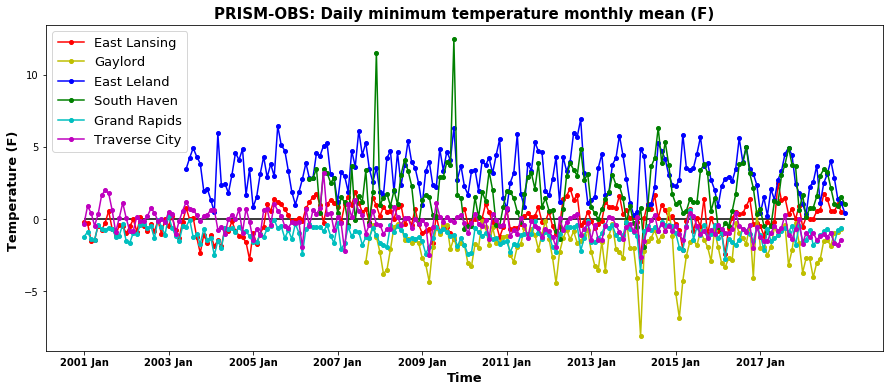

In [39]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_pr[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_pr[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_pr[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_pr[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_pr[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_pr[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('PRISM-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/prism_tmin_diff.png')

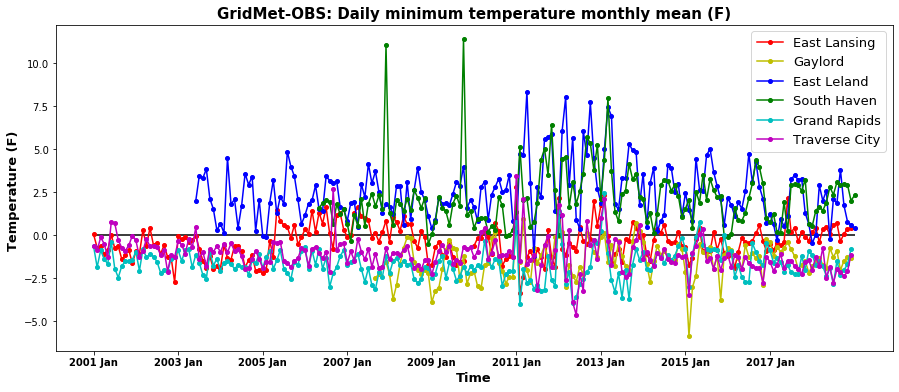

In [40]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_gm[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_gm[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_gm[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_gm[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_gm[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_gm[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('GridMet-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/GridMet_tmin_diff.png')

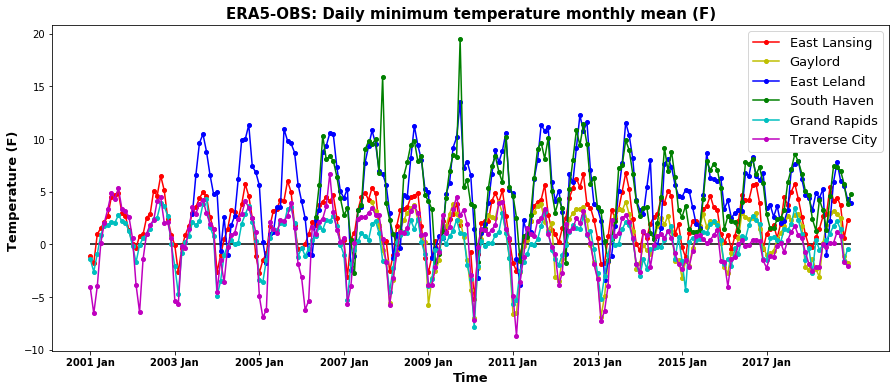

In [43]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymin_diff_era[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymin_diff_era[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymin_diff_era[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymin_diff_era[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_era[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymin_diff_era[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('ERA5-OBS: Daily minimum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/ERA5_tmin_diff.png')

In [21]:
def rmse(df1,df2):
    return sqrt(mse(df1[~np.isnan(df1)], df2[~np.isnan(df1)]))

In [19]:
rmse_pr = []
rmse_gm = []
rmse_era = []
for i in range(6):
    rmse_pr.append(rmse(np.array(t_daymin_obs[i]),pr_dt[i]))
    rmse_gm.append(rmse(np.array(t_daymin_obs[i]),gm_dt[i]))
    rmse_era.append(rmse(np.array(t_daymin_obs[i]),np.array(t_daymin_era[i])))

In [27]:
missing = []
for i in range(6):
    missing.append(((t_daymin_obs[i].isnull() | t_daymin_obs[i].isna()).sum() * 100 / t_daymin_obs[i].index.size).round(2))

days_count = []
for i in range(6):
    days_count.append(t_daymin_obs[i].shape[0])

In [29]:
df_rmse = pd.DataFrame({'Station':['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],
                        'Days':days_count,
                        'OBS missing':missing,
                        'PRISM Tmin RMSE':[rmse_pr[i] for i in range(6)],
                       'GridMet Tmin RMSE':[rmse_gm[i] for i in range(6)],
                       'ERA5 Tmin RMSE':[rmse_era[i] for i in range(6)]})
df_rmse

,Station,Days,OBS missing,PRISM Tmin RMSE,GridMet Tmin RMSE,ERA5 Tmin RMSE
0,East Lansing,6574,1.28,4.710390,4.343637,4.314539
1,Gaylord,4122,0.00,5.948640,4.377486,3.798280
2,East Leland,5723,0.26,5.996063,5.784956,7.650433
3,South Haven,4653,0.47,6.397827,6.039436,8.053709
4,Grand Rapids,6573,0.00,4.204521,4.347863,3.274009
5,Traverse City,6573,0.02,4.400529,4.707155,4.385652


In [10]:
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
pr = []
fna = ['East_Lansing_PRISM_tmax_stable_4km_20010101_20180101_42.6700_-84.4900.csv',\
      'Gaylord_PRISM_tmax_stable_4km_20010101_20180101_44.9100_-84.7200.csv',\
      'East_Leland_PRISM_tmax_stable_4km_20010101_20180101_45.0300_-85.6700.csv',\
      'South_Haven_PRISM_tmax_stable_4km_20010101_20180101_42.3600_-86.2900.csv',\
      'Grand_Rapids_PRISM_tmax_stable_4km_20010101_20180101_42.8810_-85.5230.csv',\
       'Traverse_City_PRISM_tmax_stable_4km_20010101_20180101_44.7420_-85.5820.csv']
for i in range(6):
    df = pd.read_csv('./prism/{0}'.format(fna[i]),header=[i for i in range(11)])
    df = np.array(df)[:,0]
    pr.append(df)
pr = np.array(pr)

In [13]:
el_loc = [42.67,-84.49]
gl_loc = [44.91,-84.72]
ele_loc = [45.03, -85.67]
sh_loc = [42.36, -86.29]
gr_loc = [42.881,-85.523]
tvc_loc = [44.742, -85.582]
loc = np.array([el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc])
loc_id = loc * 0

ds = xr.open_dataset('./gridmet/tmmn_2001.nc')
for i in range(6):
    loc_id[i, 0] = np.where(abs(ds.lat.values - loc[i,0]) == np.amin(abs(ds.lat.values - loc[i,0])))[0][0]
    loc_id[i, 1] = np.where(abs(ds.lon.values - loc[i,1]) == np.amin(abs(ds.lon.values - loc[i,1])))[0][0]
ds.close()

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,


In [14]:
gm = []
for k in range(6):
    data = np.array([])
    for i in range(18):
        ds = xr.open_dataset('./gridmet/tmmx_{0}.nc'.format(int(2001+i)))
        data = np.concatenate((data,ds.air_temperature[:,int(loc_id[k,0]),int(loc_id[k,1])].data),axis=0)
        ds.close()
    gm.append(data)
gm = np.array(gm)
gm = (gm - 273.15) * (9/5) + 32.0

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'air_temperature' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,
/home/mmfire/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: vari

In [15]:
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
pr_dt = [1*pr[0],1*pr[1][-4122:],1*pr[2][-5723:],1*pr[3][-4653:],1*pr[4][:-1],1*pr[5][:-1]]
gm_dt = [1*gm[0],1*gm[1][-4122:],1*gm[2][-5723:],1*gm[3][-4653:],1*gm[4][:-1],1*gm[5][:-1]]

In [16]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymax_obs = [t_daymax_obs_el,t_daymax_obs_gl,t_daymax_obs_ele,t_daymax_obs_sh,t_daymax_obs_gr,t_daymax_obs_tvc]
t_daymax_diff_pr = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(pr_dt[i]-t_daymax_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymax_diff_pr.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymax_diff'].mean()))

In [19]:
import pytz
eastern = pytz.timezone('US/Eastern')
dff = [pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='9/19/2007', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='5/2/2003', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='4/6/2006', end='1/1/2019', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern),\
      pd.date_range(start='1/1/2001', end='12/31/2018', freq='D')[1:].tz_localize(pytz.utc).tz_convert(eastern)]
locn = ['el','gl','ele','sh','gr','tvc']
t_daymax_obs = [t_daymax_obs_el,t_daymax_obs_gl,t_daymax_obs_ele,t_daymax_obs_sh,t_daymax_obs_gr,t_daymax_obs_tvc]
t_daymax_diff_gm = []
for i in range(6):
    year = dff[i].strftime('%Y')
    mon = dff[i].strftime('%-m')
    day = dff[i].strftime('%-d')
    mdiff = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'t_daymax_diff':np.array(gm_dt[i]-t_daymax_obs[i])})
    mdiff = mdiff.astype(float)
    t_daymax_diff_gm.append(np.array(mdiff.groupby([mdiff.YEAR,mdiff.MONTH])['t_daymax_diff'].mean()))

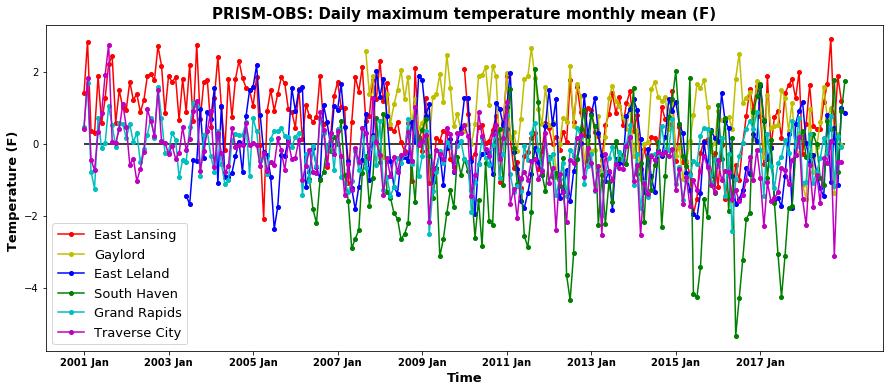

In [17]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymax_diff_pr[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymax_diff_pr[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymax_diff_pr[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_pr[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_pr[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_pr[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('PRISM-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/prism_tmax_diff.png')

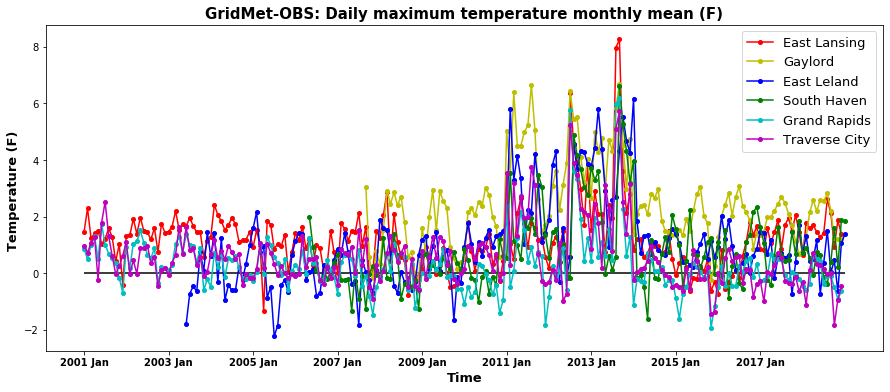

In [20]:
plt.figure(figsize=(15,6))
# [el_loc,gl_loc,ele_loc,sh_loc,gr_loc,tvc_loc]
plt.plot(list(range(1,217)), t_daymax_diff_gm[0], 'r-o', lw=1.5, ms=4)
plt.plot(list(range(81,217)), t_daymax_diff_gm[1], 'y-o', lw=1.5, ms=4)
plt.plot(list(range(30,218)), t_daymax_diff_gm[2], 'b-o', lw=1.5, ms=4)
plt.plot(list(range(65,218)), t_daymax_diff_gm[3], 'g-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_gm[4], 'c-o', lw=1.5, ms=4)
plt.plot(list(range(1,217)), t_daymax_diff_gm[5], 'm-o', lw=1.5, ms=4)

plt.hlines(0, 1, 217, 'k', lw=1.5)
plt.xticks(np.arange(1, 217, step=24),['{0} Jan'.format(2*i+2001) for i in range(9)], fontweight='bold')
plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Temperature (F) ', fontweight='bold', fontsize=13)
plt.legend(['East Lansing', 'Gaylord','East Leland', 'South Haven', 'Grand Rapids', 'Traverse City'],fontsize = 13)
plt.title('GridMet-OBS: Daily maximum temperature monthly mean (F)', fontweight='bold', fontsize=15)
plt.savefig('./plot/Summary/GridMet_tmax_diff.png')

In [24]:
rmse_pr = []
rmse_gm = []
rmse_era = []
for i in range(6):
    rmse_pr.append(rmse(np.array(t_daymax_obs[i]),pr_dt[i]))
    rmse_gm.append(rmse(np.array(t_daymax_obs[i]),gm_dt[i]))
    rmse_era.append(rmse(np.array(t_daymax_obs[i]),np.array(t_daymax_era[i])))
    

In [25]:
rmse = pd.read_csv('./summary/rmse_tmin_tmax.csv')
rmse

,Unnamed: 0,Stations,Days,OBS missing,PRISM Tmin RMSE,GridMet Tmin RMSE,ERA5 Tmin RMSE,PRISM Tmax RMSE,GridMet Tmax RMSE,ERA5 Tmax RMSE
0,0,East Lansing,6574,1.28,4.710390,4.343637,4.314539,7.325200,3.506133,2.071239
1,1,Gaylord,4122,0.00,5.948640,4.377486,3.798280,7.359786,4.147827,2.284587
2,2,East Leland,5723,0.26,5.996063,5.784956,7.650433,6.862081,4.129114,5.624394
3,3,South Haven,4653,0.47,6.397827,6.039436,8.053709,7.391703,3.884018,5.407014
4,4,Grand Rapids,6573,0.00,4.204521,4.347863,3.274009,6.770869,3.129939,2.407293
5,5,Traverse City,6573,0.02,4.400529,4.707155,4.385652,7.254828,3.597927,3.575404
